# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import requests
import tweepy
from io import StringIO
import json
from tqdm import tqdm


In [2]:
tweet_archive = pd.read_csv('twitter-archive-enhanced.csv') # read in the data

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
data = response.text
image_pred = pd.read_csv(StringIO(data), sep='\t')
image_pred.to_csv('image_predictions.tsv')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:
from dotenv import load_dotenv
load_dotenv()

bearer_token = os.environ.get('BEARER_TOKEN')

tweet_id = list(tweet_archive['tweet_id'])
missing_tweets = []

In [5]:
# if not os.path.exists('tweet_json.txt'):
#     with open('tweet_json.txt', 'w'): pass
# def get_tweet():
#     auth = tweepy.OAuth2BearerHandler(bearer_token)
#     api = tweepy.API(auth)
#     for id in tqdm(tweet_id):
#         try:
#             tweet = api.get_status(id, tweet_mode='extended')
#             with open('tweet_json.txt', 'a') as f:
#                 json.dump(tweet._json, f)
#                 f.write('\n')
#         except:
#             print('Missing Tweet for id: {}'.format(id))
#             missing_tweets.append(id)
#             continue

# # Driver code
# if __name__ == '__main__':
# #   Call the function
#     get_tweet()


In [6]:
# with open('tweet_json.txt', 'r') as f:
with open('json.txt', 'r') as f:
    gathered_tweet_df = pd.DataFrame(columns=('tweet_id', 'retweet_count', 'favorite_count'))
    tweets = f.readlines()
    for tweet in tweets:
        tweet = json.loads(tweet)
        gathered_tweet_df.loc[len(gathered_tweet_df.index)] = [tweet['id'], tweet['retweet_count'], tweet['favorite_count']]

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [7]:
gathered_tweet_df.shape

(2354, 3)

In [8]:
gathered_tweet_df.sample(4)

,tweet_id,retweet_count,favorite_count
1362,702899151802126337,509,1772
1453,695409464418041856,4017,9460
1525,690360449368465409,1006,2925
501,813081950185472002,3220,10989


In [9]:
gathered_tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   object
 2   favorite_count  2354 non-null   object
dtypes: object(3)
memory usage: 73.6+ KB


In [10]:
gathered_tweet_df.describe()

,tweet_id,retweet_count,favorite_count
count,2354,2354,2354
unique,2354,1724,2007
top,667495797102141441,3652,0
freq,1,5,179


In [11]:
# Check null values in gathered_tweet_df
gathered_tweet_df.isnull().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

In [12]:
# Check duplicates in gathered_tweet_df
gathered_tweet_df.duplicated().sum()

0

In [13]:
image_pred.sample(4)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
382,673320132811366400,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True
1142,729854734790754305,https://pbs.twimg.com/media/CiD3AfkXEAA3S_r.jpg,1,doormat,0.359586,False,china_cabinet,0.053901,False,passenger_car,0.052665,False
1860,842163532590374912,https://pbs.twimg.com/media/C6_3QgMWsAMNnAk.jpg,2,French_bulldog,0.891227,True,soccer_ball,0.022811,False,bull_mastiff,0.012852,True
1423,772117678702071809,https://pbs.twimg.com/media/Crcc7pqXEAAM5O2.jpg,1,Labrador_retriever,0.217821,True,beagle,0.157677,True,golden_retriever,0.127726,True


In [14]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
image_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [16]:
# Check duplicates in image_pred
image_pred.duplicated().sum()

0

In [18]:
tweet_archive.sample(4)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
673,789628658055020548,NaN,NaN,2016-10-22 00:45:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Eli. He can fly. 13/10 magical af http...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/789628658...,13,10,Eli,None,None,None,None
1418,698355670425473025,NaN,NaN,2016-02-13 03:59:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jessiga. She's a Tasmanian McCringlebe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/698355670...,10,10,Jessiga,None,None,None,None
2315,666691418707132416,NaN,NaN,2015-11-17 18:56:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Christoper. He is a spotted Penne. Can...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666691418...,8,10,Christoper,None,None,None,None
1875,675113801096802304,NaN,NaN,2015-12-11 00:44:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Zuzu. He just graduated college. Astute p...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675113801...,10,10,Zuzu,None,None,pupper,None


In [19]:
tweet_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [20]:
tweet_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [21]:
# Check null values in tweet_archive
tweet_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

* Columns such as retweet_status_id have high null values
* Those columns and some other ones have high null values and are not useful for our analysis


In [23]:
# Check duplicates in tweet_archive
tweet_archive.duplicated().sum()

0

In [24]:
tweet_archive.query('doggo == "doggo"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None
43,884162670584377345,NaN,NaN,2017-07-09 21:29:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,doggo,None,None,None
99,872967104147763200,NaN,NaN,2017-06-09 00:02:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very large dog. He has a date later. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/872967104...,12,10,None,doggo,None,None,None
108,871515927908634625,NaN,NaN,2017-06-04 23:56:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Napolean. He's a Raggedy East Nicaragu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/871515927...,12,10,Napolean,doggo,None,None,None
110,871102520638267392,NaN,NaN,2017-06-03 20:33:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,NaN,NaN,NaN,https://twitter.com/animalcog/status/871075758...,14,10,None,doggo,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117,732375214819057664,NaN,NaN,2016-05-17 01:00:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kyle (pronounced 'Mitch'). He strives ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/732375214...,11,10,Kyle,doggo,None,None,None
1141,727644517743104000,NaN,NaN,2016-05-03 23:42:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo struggling to cope with the win...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/727644517...,13,10,None,doggo,None,None,None
1156,724771698126512129,NaN,NaN,2016-04-26 01:26:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Nothin better than a doggo and a sunset. 11/10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/724771698...,11,10,None,doggo,None,None,None
1176,719991154352222208,NaN,NaN,2016-04-12 20:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This doggo was initially thrilled when she saw...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/719991154...,10,10,None,doggo,None,None,None


In [25]:
# Get some of unique values in the floofer column
tweet_archive.groupby('floofer').count()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,pupper,puppo
floofer,,,,,,,,,,,,,,,,
None,2346,78,78,2346,2346,2346,181,181,181,2287,2346,2346,2346,2346,2346,2346
floofer,10,0,0,10,10,10,0,0,0,10,10,10,10,10,10,10


In [26]:
# Get some of unique values in the puppo column
tweet_archive.groupby('puppo').count()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper
puppo,,,,,,,,,,,,,,,,
None,2326,77,77,2326,2326,2326,176,176,176,2268,2326,2326,2326,2326,2326,2326
puppo,30,1,1,30,30,30,5,5,5,29,30,30,30,30,30,30


In [27]:
pd.set_option('display.max_colwidth', None)

In [28]:
# Find the tweet with the highest rating numerator
tweet_archive.query('rating_numerator == rating_numerator.max()')['text']

979    This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh
Name: text, dtype: object

In [29]:
tweet_archive[['text','name', 'rating_numerator', 'rating_denominator']].sample(15)


,text,name,rating_numerator,rating_denominator
2270,Say hello to Hall and Oates. Oates is winking and Hall is contemplating the artistic entropy of the universe. 11/10s https://t.co/n5Wtb5Hvsl,Hall,11,10
769,This is Jeffrey. He's being held so he doesn't fly away. 12/10 would set free https://t.co/d3aLyCykn7,Jeffrey,12,10
2051,This is Julius. He's a cool dog. Carries seashell everywhere. Rad segmented legs. Currently attacking castle. 8/10 https://t.co/CwUK5AIgeD,Julius,8,10
1327,This is Adele. Her tongue flies out of her mouth at random. It's a debilitating illness. 10/10 stay strong pupper https://t.co/cfn81n3FLO,Adele,10,10
1797,This is the happiest pupper I've ever seen. 10/10 would trade lives with https://t.co/ep8ATEJwRb,the,10,10
1973,This is Dexter. He just got some big news. 10/10 https://t.co/CbvCUE6PFI,Dexter,10,10
114,This is Cody. He zoomed too aggressively and tore his ACL. Happens to the best of us. Still 13/10\n\nHelp Cody here: https://t.co/4hxnDOt1CV https://t.co/42ryYRQ2Q4,Cody,13,10
458,Looks like he went cross-eyed trying way too hard to use the force. 12/10 \nhttps://t.co/bbuKxk0fM8,None,12,10
1551,Meet Trip. He likes wearing costumes that aren't consistent with the season to screw with people 10/10 tricky pupper https://t.co/40w7TI5Axv,Trip,10,10
2241,Meet Otis. He is a Peruvian Quartzite. Pic sponsored by Planters. Ears on point. Killer sunglasses. 10/10 ily Otis https://t.co/tIaaBIMlJN,Otis,10,10


In [30]:
tweet_archive[['text', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']].sample(15)

,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp
736,I want to finally rate this iconic puppo who thinks the parade is all for him. 13/10 would absolutely attend https://t.co/5dUYOu4b8d,NaN,NaN,NaN
1395,This is Cooper. He began to tear up when his bone was taken from him. 11/10 stay strong pupper https://t.co/qI8yvqKG02,NaN,NaN,NaN
623,This is Daisy. She's here to make your day better. 13/10 mission h*ckin successful https://t.co/PbgvuD0qIL,NaN,NaN,NaN
315,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,NaN,NaN,NaN
528,This is Koda. He dug a hole and then sat in it because why not. Unamused by the bath that followed. 12/10 https://t.co/SQhyqrr8px,NaN,NaN,NaN
1286,RT if you are as ready for summer as this pup is 12/10 https://t.co/xdNNEZdGJY,NaN,NaN,NaN
1793,Meet Humphrey. He's a Northern Polyp Viagra. One ear works. Face stuck like that. Always surprised. 9/10 petable af https://t.co/FS7eJQM2F4,NaN,NaN,NaN
410,This is Wyatt. He's got the fastest paws in the West. H*ckin deadly. 11/10 would ride into the sunset with https://t.co/stkJ377KK7,NaN,NaN,NaN
1969,Take a moment and appreciate how these two dogs fell asleep. Simply magnificent. 10/10 for both https://t.co/juX48bWpng,NaN,NaN,NaN
1150,I'm getting super heckin frustrated with you all sending in non canines like this ostrich. We only rate dogs... 9/10 https://t.co/Rgbni2Ns8z,NaN,NaN,NaN


In [31]:
tweet_archive['name'].value_counts()

None       745
a           55
Charlie     12
Lucy        11
Cooper      11
          ... 
Poppy        1
Oddie        1
Rolf         1
Jameson      1
Pavlov       1
Name: name, Length: 957, dtype: int64

### Quality issues
``tweet_archive table``

1. Some of the tweets are retweets and some are not even about dogs and still have ratings

2. Some of the columns like in_reply_to_status_id, in_reply_to_user_id have no real use case and are mostly null

3. Some of the dog names are incorrect and some of them having the value None

4. Incorrect ratings for some of the dogs

5. Incorrect data type for some of the columns like timestamp

6. Lots of None values in the dog types columns

``image_pred table``

7. Tweets with false p1_dog value tend not to be dog

8. Image number column doesn't seem to convey any actual value for analysis

9. Wrong data type for p1, p2, p3

### Tidiness issues
1. The dog stages should have been a single column instead of being split into three

2. Too many datasets. They can be merged for managability

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [32]:
# Make copies of original pieces of data
tweet_archive_copy = tweet_archive.copy()
image_pred_copy = image_pred.copy()
gathered_tweet_df_copy = gathered_tweet_df.copy()

In [33]:
dogitionary = ['doggo', 'floofer', 'pupper', 'puppo']

### Issue #1:
* Some of the tweets are retweets and may not be about dogs

#### Define:
- Tweets having non-null values in retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp should be dropped
- It is noticed from the describe function above we have a total of 181 non-null values in these columns

#### Code

In [34]:
tweet_archive_copy.shape

(2356, 17)

In [35]:
# Drop rows having non-null values in retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns of tweet_archive_copy
tweet_archive_copy = tweet_archive_copy.loc[tweet_archive_copy['retweeted_status_id'].isnull()]

In [36]:
# Drop the retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns of tweet_archive_copy
tweet_archive_copy = tweet_archive_copy.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

#### Test

In [37]:
tweet_archive_copy.shape


(2175, 14)

In [38]:
tweet_archive_copy.sample(4)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1904,674632714662858753,NaN,NaN,2015-12-09 16:52:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Rare submerged pup here. Holds breath for a long time. Frowning because that spoon ignores him. 5/10 would still pet https://t.co/EJzzNHE8bE,https://twitter.com/dog_rates/status/674632714662858753/photo/1,5,10,None,None,None,None,None
1245,711732680602345472,NaN,NaN,2016-03-21 01:54:29 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I want to hear the joke this dog was just told. 10/10 https://t.co/1KiuZqqOD4,"https://twitter.com/dog_rates/status/711732680602345472/photo/1,https://twitter.com/dog_rates/status/711732680602345472/photo/1,https://twitter.com/dog_rates/status/711732680602345472/photo/1",10,10,None,None,None,None,None
60,880465832366813184,NaN,NaN,2017-06-29 16:39:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bella. She had her first beach experience this morning. Complete success. 12/10 would perform a sandy boop https://t.co/4VsFysDmiw,"https://twitter.com/dog_rates/status/880465832366813184/photo/1,https://twitter.com/dog_rates/status/880465832366813184/photo/1,https://twitter.com/dog_rates/status/880465832366813184/photo/1,https://twitter.com/dog_rates/status/880465832366813184/photo/1",12,10,Bella,None,None,None,None
1140,727685679342333952,NaN,NaN,2016-05-04 02:26:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cilantro. She's a Fellation Gadzooks. Eyes are super magical af. 12/10 could get lost in https://t.co/yJ26LNuyj5,https://twitter.com/dog_rates/status/727685679342333952/photo/1,12,10,Cilantro,None,None,None,None


### Issue #2:
- Invalid columns with almost all NaN values

#### Define:
- in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp,source
- Drop above columns with the drop function

#### Code

In [39]:
useless_columns = ['in_reply_to_status_id', 'in_reply_to_user_id','source']

In [40]:
tweet_archive_copy.drop(useless_columns, axis=1, inplace=True)

#### Test

In [41]:
tweet_archive_copy.sample(4)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
205,852912242202992640,2017-04-14 15:51:39 +0000,Meet Benny. He likes being adorable and making fun of you while you're on the trampoline. 12/10 let's help him out\n\nhttps://t.co/aVMjBqAy1x https://t.co/7gx2LksT3U,"https://www.gofundme.com/bennys-medical-bills,https://twitter.com/dog_rates/status/852912242202992640/photo/1,https://twitter.com/dog_rates/status/852912242202992640/photo/1",12,10,Benny,None,None,None,None
743,780459368902959104,2016-09-26 17:29:48 +0000,"This is Bear. Don't worry, he's not a real bear tho. Contains unreal amounts of squish. 11/10 heteroskedastic af https://t.co/coi4l1T2Sm",https://twitter.com/dog_rates/status/780459368902959104/photo/1,11,10,Bear,None,None,None,None
1643,683857920510050305,2016-01-04 03:50:08 +0000,Meet Sadie. She fell asleep on the beach and her friends buried her. 10/10 can't trust fellow puppers these days https://t.co/LoKVvc1xAW,https://twitter.com/dog_rates/status/683857920510050305/photo/1,10,10,Sadie,None,None,None,None
2318,666454714377183233,2015-11-17 03:16:00 +0000,I'll name the dogs from now on. This is Kreggory. He does parkour. 10/10 https://t.co/uPqPeXAcua,https://twitter.com/dog_rates/status/666454714377183233/photo/1,10,10,Kreggory,None,None,None,None


### Issue #3:
- Incorrect names
- None values for some of the names

#### Define:
- Find the names that are not correct by using value count
- Replace incorrect names and None values with NaN

#### Code

In [42]:
# # First, remove all tweets that don't contain any of the dog words
# for word in dogitionary:
#     tweet_archive_copy = tweet_archive_copy[tweet_archive_copy['text'].str.contains(word)]


In [43]:
# Create a csv file containg names of dogs and view them visually
counts = tweet_archive_copy['name'].value_counts()
counts.to_csv('name.csv', index=True)

In [44]:
# Get all the invalid names and remove them from the dataframe
# We notice invalid names starts with lowercase letters.

# Create a list of invalid names
invalid_names = ['None']
for name in tweet_archive_copy.name:
    if name[0].islower():
        invalid_names.append(name)

In [45]:
# Get unique invalid names
invalid_names = list(set(invalid_names))

In [46]:
tweet_archive_copy.shape

(2175, 11)

In [47]:
# Remove invalid names from the dataframe
tweet_archive_copy = tweet_archive_copy[~tweet_archive_copy['name'].isin(invalid_names)]
tweet_archive_copy.name.value_counts()

Charlie    11
Lucy       11
Cooper     10
Oliver     10
Tucker      9
           ..
Rilo        1
Duddles     1
Meera       1
Miguel      1
Tito        1
Name: name, Length: 930, dtype: int64

In [48]:
# View the dataframe
tweet_archive_copy.shape

(1391, 11)

#### Test

In [49]:
# verify that the dataframe is now clean of invalid names
tweet_archive_copy[['text','name']].sample(10)

,text,name
1539,Meet Luca. He's a Butternut Scooperfloof. Glorious tongue. 12/10 would pet really well https://t.co/VcxZQPNZaV,Luca
959,This is Gilbert. He's being chased by a battalion of miniature floof cows. 10/10 we all believe in you Gilbert https://t.co/wayKZkDRTG,Gilbert
977,Meet Piper. She's an airport doggo. Please return your tray table to its full pupright and locked position. 11/10 https://t.co/D17IAcetmM,Piper
1462,This is Archie. He's a Bisquick Taj Mapaw. Too many people are touching him. It is doing him a discomfort. 10/10 https://t.co/CJJpjTMzPQ,Archie
196,This is Marlee. She fetched a flower and immediately requested that it be placed behind her ear. 12/10 elegant af https://t.co/nJztIEON5s,Marlee
1700,This is Ozzie. He was doing fine until he lost traction in those festive socks. Now he's tired. 9/10 still killin it https://t.co/u4FYdIRKnY,Ozzie
592,This is Iroh. He's in a predicament. 12/10 someone help him https://t.co/KJAKO2kXsL,Iroh
1910,This is Jonah. He's a Stinted Fisher Price. Enjoys chewing on his miniature RipStik. 10/10 very upbeat fellow https://t.co/7qjXy1uUYY,Jonah
1003,This is Huxley. He's pumped for #BarkWeek. Even has a hat. Ears are quite magical. 11/10 would remove hat to pat https://t.co/V7h5NMYbYz,Huxley
1333,This is Cooper. He only wakes up to switch gears. 12/10 helpful af https://t.co/EEIkAGVY64,Cooper


### Issue #4:
Incorrect Ratings for some of the dogs

#### Define
- We were told the denominator is always 10. By viewing the describe function above we can confirm the denominator has
- numbers greater than 10
- We will find all numbers greater than 10 in the denominator column and replace them with 10.
- We will also find uncommon numerators and replace them with proper values

#### Code

In [50]:
# Reset pandas display options
pd.reset_option('display.max_colwidth')

In [51]:
tweet_archive_copy[['text','name', 'rating_numerator', 'rating_denominator']].sample(10)

,text,name,rating_numerator,rating_denominator
145,This is Neptune. He's a backpup vocalist for t...,Neptune,13,10
1297,This is Sadie. She's a Bohemian Rhapsody. Rema...,Sadie,11,10
370,This is Mutt Ryan. He's quite confident at the...,Mutt,12,10
2110,This is Paull. He just stubbed his toe. 10/10 ...,Paull,10,10
299,This is Mookie. He really enjoys shopping but ...,Mookie,12,10
1229,This is Piper. She would really like that tenn...,Piper,12,10
1426,This is Carter. He wakes up in the morning and...,Carter,10,10
1633,This is Obi. He got camera shy. 12/10 https://...,Obi,12,10
1026,This is Gustav. He has claimed that plant. It ...,Gustav,10,10
2111,Meet Koda. He's large. Looks very soft. Great ...,Koda,11,10


In [52]:
# Find the distribution of denominator values
tweet_archive_copy['rating_denominator'].value_counts()

10    1388
50       1
11       1
7        1
Name: rating_denominator, dtype: int64

In [53]:
tweet_archive_copy.query('rating_denominator < 10')

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
516,810984652412424192,2016-12-19 23:06:23 +0000,Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None


In [54]:
tweet_archive_copy.query('rating_denominator > 10')

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1202,716439118184652801,2016-04-03 01:36:11 +0000,This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1662,682962037429899265,2016-01-01 16:30:13 +0000,This is Darrel. He just robbed a 7/11 and is i...,https://twitter.com/dog_rates/status/682962037...,7,11,Darrel,None,None,None,None


In [55]:
# View the distribution of rating numerator
tweet_archive_copy.rating_numerator.describe()

count    1391.000000
mean       12.091301
std        47.413241
min         2.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [56]:
# Find all ratings numerator greater than the 75th percentile
greater_than_75 = tweet_archive_copy['rating_numerator'][tweet_archive_copy['rating_numerator'] > tweet_archive_copy['rating_numerator'].quantile(0.75)]
print(greater_than_75.value_counts())

13      183
14       17
1776      1
75        1
50        1
27        1
24        1
Name: rating_numerator, dtype: int64


In [57]:
pd.set_option('display.max_colwidth', None)

In [58]:
# Find the tweet with the highest rating numerator
tweet_archive_copy.query('rating_numerator == rating_numerator.max()')

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,2016-07-04 15:00:45 +0000,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776,10,Atticus,None,None,None,None


In [59]:
# The above tweet has a rating numerator greater than the 75th percentile and seems to somehow correlate to the American Independence Day. 
# We can drop this tweet from the dataframe since it is an outlier and we don't want to include it in our analysis.
tweet_archive_copy = tweet_archive_copy[tweet_archive_copy['rating_numerator'] != 1776]

In [60]:
tweet_archive_copy.query('rating_numerator == "75"')

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
695,786709082849828864,2016-10-13 23:23:56 +0000,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None


In [61]:
# On close analysis we find that the extracted ratings numerator is wrong. We need to correct the rating.
# We can correct the ratings by using the approximated figure in the tweet.

# Replace the rating numerator with the approximated figure
tweet_archive_copy['rating_numerator'] = tweet_archive_copy['rating_numerator'].apply(lambda x: 10 if x==75 else x)

In [62]:
tweet_archive_copy.query('rating_numerator == "50"')

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1202,716439118184652801,2016-04-03 01:36:11 +0000,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,https://twitter.com/dog_rates/status/716439118184652801/photo/1,50,50,Bluebert,None,None,None,None


In [63]:
# Replace the numerator and denominator ratings having a value of 50 with the exact figure
tweet_archive_copy['rating_numerator'] = tweet_archive_copy['rating_numerator'].apply(lambda x: 11 if x==50 else x)
tweet_archive_copy['rating_denominator'] = tweet_archive_copy['rating_denominator'].apply(lambda x: 10 if x==50 else x)


In [64]:
tweet_archive_copy.query('rating_numerator == "27"')

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
763,778027034220126208,2016-09-20 00:24:34 +0000,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,None,None,pupper,None


In [65]:
# Using the above manual process we can correct the ratings numerator to the approximated figure.
tweet_archive_copy['rating_numerator'] = tweet_archive_copy['rating_numerator'].apply(lambda x: 11 if x==27 else x)

In [66]:
tweet_archive_copy.query('rating_numerator == "24"')

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
516,810984652412424192,2016-12-19 23:06:23 +0000,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None


In [67]:
# Drop row with rating numerator of 24
tweet_archive_copy = tweet_archive_copy[tweet_archive_copy['rating_numerator'] != 24]

#### Test

In [68]:
# Print the highest and lowest rating denominator and numerator
tweet_archive_copy.groupby('rating_denominator').rating_numerator.max().sort_values(ascending=False)



rating_denominator
10    14
11     7
Name: rating_numerator, dtype: int64

In [69]:
tweet_archive_copy.groupby('rating_numerator').rating_denominator.max().sort_values(ascending=False)


rating_numerator
7     11
14    10
13    10
12    10
11    10
10    10
9     10
8     10
6     10
5     10
4     10
3     10
2     10
Name: rating_denominator, dtype: int64

### Issue 5:
- Some columns have wrong datatypes

#### Define
- Change datatypes for columns such as timestamp using pandas datetime function

#### Code

In [70]:
# Confirm datatypes of columns
tweet_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1389 entries, 0 to 2325
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            1389 non-null   int64 
 1   timestamp           1389 non-null   object
 2   text                1389 non-null   object
 3   expanded_urls       1389 non-null   object
 4   rating_numerator    1389 non-null   int64 
 5   rating_denominator  1389 non-null   int64 
 6   name                1389 non-null   object
 7   doggo               1389 non-null   object
 8   floofer             1389 non-null   object
 9   pupper              1389 non-null   object
 10  puppo               1389 non-null   object
dtypes: int64(3), object(8)
memory usage: 130.2+ KB


In [71]:
# Change the datatype for timestamp column to datetime
tweet_archive_copy['timestamp'] = pd.to_datetime(tweet_archive_copy['timestamp'])

In [72]:
# Find distribution of tweets by year of creation in tweet_archive_copy
tweet_archive_copy['timestamp'].dt.year.value_counts()

2016    726
2015    379
2017    284
Name: timestamp, dtype: int64

#### Test

In [73]:
tweet_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1389 entries, 0 to 2325
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1389 non-null   int64              
 1   timestamp           1389 non-null   datetime64[ns, UTC]
 2   text                1389 non-null   object             
 3   expanded_urls       1389 non-null   object             
 4   rating_numerator    1389 non-null   int64              
 5   rating_denominator  1389 non-null   int64              
 6   name                1389 non-null   object             
 7   doggo               1389 non-null   object             
 8   floofer             1389 non-null   object             
 9   pupper              1389 non-null   object             
 10  puppo               1389 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(7)
memory usage: 130.2+ KB


### Issue 6:
- Lots of None values in the doggo, floofer, pupper and puppo columns

#### Define
- Drop rows if the values of doggo, floofer, pupper and puppo are all None

#### Code

In [74]:
# Count unique values in the doggo, floofer, pupper, puppo columns
tweet_archive_copy[['doggo', 'floofer', 'pupper', 'puppo']].value_counts()

doggo  floofer  pupper  puppo
None   None     None    None     1205
                pupper  None      121
doggo  None     None    None       38
None   None     None    puppo      16
       floofer  None    None        5
doggo  None     pupper  None        4
dtype: int64

In [75]:
# Generate indices for the dataframe for those columns that have missing values in the dog type columns
index_names = tweet_archive_copy[ (tweet_archive_copy['doggo'] == 'None') & (tweet_archive_copy['floofer'] == 'None') & (tweet_archive_copy['pupper'] == 'None') & (tweet_archive_copy['puppo'])].index


In [123]:
# Drop rows where all the doggo, floofer, pupper, puppo columns are all'None'
tweet_archive_copy.drop(index_names, inplace = True)

KeyError: '[   1    3    4 ... 2318 2319 2325] not found in axis'

#### Test

In [77]:
# Count unique values in the doggo, floofer, pupper, puppo columns
tweet_archive_copy[['doggo', 'floofer', 'pupper', 'puppo']].value_counts()

doggo  floofer  pupper  puppo
None   None     pupper  None     121
doggo  None     None    None      38
None   floofer  None    None       5
doggo  None     pupper  None       4
dtype: int64

In [78]:
# Find all tweets that have non null values in the doggo and pupper columns
# These dogs are puppo dogs

tweet_archive_copy[(tweet_archive_copy['doggo'] != 'None') & (tweet_archive_copy['pupper'] != 'None')]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
460,817777686764523521,2017-01-07 16:59:28+00:00,"This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",https://twitter.com/dog_rates/status/817777686764523521/video/1,13,10,Dido,doggo,None,pupper,None
575,801115127852503040,2016-11-22 17:28:25+00:00,This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,"https://twitter.com/dog_rates/status/801115127852503040/photo/1,https://twitter.com/dog_rates/status/801115127852503040/photo/1",12,10,Bones,doggo,None,pupper,None
705,785639753186217984,2016-10-11 00:34:48+00:00,This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,"https://twitter.com/dog_rates/status/785639753186217984/photo/1,https://twitter.com/dog_rates/status/785639753186217984/photo/1",10,10,Pinot,doggo,None,pupper,None
889,759793422261743616,2016-07-31 16:50:42+00:00,"Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll","https://twitter.com/dog_rates/status/759793422261743616/photo/1,https://twitter.com/dog_rates/status/759793422261743616/photo/1",12,10,Maggie,doggo,None,pupper,None


* Since dogs classified as both doggo and pupper are puppo we have to replace the 4 tweets with the appropriate name of puppo


In [80]:
# Find all 4 tweets with the class of doggo and pupper and replace them with puppo
tweet_archive_copy['puppo'] = np.where(tweet_archive_copy['doggo'].eq("doggo") & tweet_archive_copy['pupper'].eq('pupper'),'puppo',tweet_archive_copy['puppo'])


In [81]:
# Replace values in the doggo and pupper column based on the value in the puppo column
tweet_archive_copy['doggo'] = np.where(tweet_archive_copy['puppo'].eq('puppo'),'None',tweet_archive_copy['doggo'])
tweet_archive_copy['pupper'] = np.where(tweet_archive_copy['puppo'].eq('puppo'),'None',tweet_archive_copy['pupper'])

#### Test

In [82]:
tweet_archive_copy[['doggo', 'floofer', 'pupper', 'puppo']].value_counts()


doggo  floofer  pupper  puppo
None   None     pupper  None     121
doggo  None     None    None      38
None   floofer  None    None       5
       None     None    puppo      4
dtype: int64

### Issue 7:
- Tweets with false p1_dog value tend not to be dogs

#### Define
- Delete rows containing False as a value in p1_dog column

#### Code

In [83]:
# Delete rows containing False in the p1_dog column in the image_pred_copy dataframe
image_pred_copy = image_pred_copy[image_pred_copy['p1_dog'] == True]

#### Test

In [84]:
image_pred_copy.groupby('p1_dog').count()

,tweet_id,jpg_url,img_num,p1,p1_conf,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
p1_dog,,,,,,,,,,,
True,1532,1532,1532,1532,1532,1532,1532,1532,1532,1532,1532


In [85]:
image_pred_copy.shape

(1532, 12)

### Issue 8:
- img_num column does'nt seem to convey any actual value for analys

#### Define
- img_num column should be dropped using the drop method

#### Code

In [86]:
# Drop image_num column from image_pred
image_pred_copy = image_pred_copy.drop(['img_num'], axis=1)

<?@>

#### Test

In [87]:
image_pred_copy.sample(4)

,tweet_id,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1920,856282028240666624,https://pbs.twimg.com/media/C-If9ZwXoAAfDX2.jpg,Chihuahua,0.876543,True,Italian_greyhound,0.032962,True,Cardigan,0.020776,True
134,668484198282485761,https://pbs.twimg.com/media/CUbu1GAWsAEH3E-.jpg,standard_poodle,0.587372,True,Bedlington_terrier,0.182411,True,Afghan_hound,0.040968,True
1719,819227688460238848,https://pbs.twimg.com/media/C157Oq3WQAEOyHm.jpg,Border_terrier,0.482452,True,German_shepherd,0.181082,True,Norwegian_elkhound,0.065257,True
1786,829449946868879360,https://pbs.twimg.com/media/C4LMUf8WYAkWz4I.jpg,Labrador_retriever,0.315163,True,golden_retriever,0.153210,True,Pekinese,0.132791,True


### Issue 9:
- Wrong data type for p1, p2, p3

#### Define
- Convert p1, p2, p3 data type from strings to categorical type

#### Code

In [88]:
# Convert p1, p2, p3 datatype to categorical

convert_dict = {'p1': 'category', 'p2': 'category', 'p3': 'category'}
image_pred_copy = image_pred_copy.astype(convert_dict)

#### Test

In [89]:
image_pred_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1532 entries, 0 to 2073
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   tweet_id  1532 non-null   int64   
 1   jpg_url   1532 non-null   object  
 2   p1        1532 non-null   category
 3   p1_conf   1532 non-null   float64 
 4   p1_dog    1532 non-null   bool    
 5   p2        1532 non-null   category
 6   p2_conf   1532 non-null   float64 
 7   p2_dog    1532 non-null   bool    
 8   p3        1532 non-null   category
 9   p3_conf   1532 non-null   float64 
 10  p3_dog    1532 non-null   bool    
dtypes: bool(3), category(3), float64(3), int64(1), object(1)
memory usage: 107.8+ KB


### Tidiness Issue

### Issue 1
- The three dog stages is not necessary. There should all be under a single column

#### Define
- Collapse the three dog stages into a single column
- Use the pandas melt function

In [90]:
# Replace all 'None' strings with NaN values in the doggo, floofer, pupper, puppo columns
tweet_archive_copy['doggo'].replace('None', np.nan, inplace=True)
tweet_archive_copy['floofer'].replace('None', np.nan, inplace=True)
tweet_archive_copy['pupper'].replace('None', np.nan, inplace=True)
tweet_archive_copy['puppo'].replace('None', np.nan, inplace=True)

In [91]:
tweet_archive_copy.sample(2)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
220,850019790995546112,2017-04-06 16:18:05+00:00,Say hello to Boomer. He's a sandy pupper. Having a h*ckin blast. 12/10 would pet passionately https://t.co/ecb3LvExde,"https://twitter.com/dog_rates/status/850019790995546112/photo/1,https://twitter.com/dog_rates/status/850019790995546112/photo/1,https://twitter.com/dog_rates/status/850019790995546112/photo/1",12,10,Boomer,NaN,NaN,pupper,NaN
107,871762521631449091,2017-06-05 16:15:56+00:00,This is Rover. As part of pupper protocol he had to at least attempt to eat the plant. Confirmed not tasty. Needs peanut butter. 12/10 https://t.co/AiVljI6QCg,"https://twitter.com/dog_rates/status/871762521631449091/photo/1,https://twitter.com/dog_rates/status/871762521631449091/photo/1,https://twitter.com/dog_rates/status/871762521631449091/photo/1",12,10,Rover,NaN,NaN,pupper,NaN


In [92]:
# Use pandas melt function to convert the dataframe to long format
tweet_archive_copy = pd.melt(tweet_archive_copy, id_vars=['tweet_id','timestamp','text','expanded_urls','rating_numerator','rating_denominator','name'],  var_name='dog_type')

In [93]:
# tweet_archive_copy.drop('value', axis=1, inplace=True)
# Find unique values in the value column
tweet_archive_copy['value'].unique()

array(['doggo', nan, 'floofer', 'pupper', 'puppo'], dtype=object)

#### Test

In [94]:
tweet_archive_copy.sample(2)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,value
584,735256018284875776,2016-05-24 23:47:49+00:00,This is Kellogg. He accidentally opened the front facing camera. 8/10 get it together doggo https://t.co/MRYv7nDPyS,https://twitter.com/dog_rates/status/735256018284875776/photo/1,8,10,Kellogg,puppo,NaN
48,785639753186217984,2016-10-11 00:34:48+00:00,This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,"https://twitter.com/dog_rates/status/785639753186217984/photo/1,https://twitter.com/dog_rates/status/785639753186217984/photo/1",10,10,Pinot,doggo,NaN


In [95]:
# Drop all rows where the value column is NaN
tweet_archive_copy = tweet_archive_copy[tweet_archive_copy['value'].notnull()]

In [96]:
tweet_archive_copy.shape

(168, 9)

In [97]:
# Drop the value column
tweet_archive_copy = tweet_archive_copy.drop(['value'], axis=1)

In [98]:
# Count unique values in the dog_type column
tweet_archive_copy['dog_type'].value_counts()

pupper     121
doggo       38
floofer      5
puppo        4
Name: dog_type, dtype: int64

### Issue 2:
- Three datasets instead of one

#### Define
- The three datasets can be merged together using pandas merge function

#### Code

In [99]:
from functools import reduce

#define list of DataFrames
dfs = [tweet_archive_copy, image_pred_copy, gathered_tweet_df]

#merge all DataFrames into one
final_df = reduce(lambda  left,right: pd.merge(left,right,on=['tweet_id'],
                                            how='outer'), dfs)

In [100]:
final_df.shape

(2355, 20)

In [101]:
# Drop rows with NaN values in final_df
final_df = final_df.dropna()

In [102]:
final_df.sample(2)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,8.902403e+17,2017-07-26 15:59:51+00:00,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,https://twitter.com/dog_rates/status/890240255349198849/photo/1,14.0,10.0,Cassie,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,7711,32467
167,7.597934e+17,2016-07-31 16:50:42+00:00,"Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll","https://twitter.com/dog_rates/status/759793422261743616/photo/1,https://twitter.com/dog_rates/status/759793422261743616/photo/1",12.0,10.0,Maggie,puppo,https://pbs.twimg.com/media/CotUFZEWcAA2Pku.jpg,golden_retriever,0.985876,True,Labrador_retriever,0.001948,True,kuvasz,0.001752,True,2173,6620


In [103]:
final_df.shape

(120, 20)

In [104]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 0 to 167
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            120 non-null    float64            
 1   timestamp           120 non-null    datetime64[ns, UTC]
 2   text                120 non-null    object             
 3   expanded_urls       120 non-null    object             
 4   rating_numerator    120 non-null    float64            
 5   rating_denominator  120 non-null    float64            
 6   name                120 non-null    object             
 7   dog_type            120 non-null    object             
 8   jpg_url             120 non-null    object             
 9   p1                  120 non-null    category           
 10  p1_conf             120 non-null    float64            
 11  p1_dog              120 non-null    object             
 12  p2                  120 non-null    

### Extra Issues in the final df
- integer values for tweet id
- ratings should be int64
- dog_type should be a category
- retweets and favorite counts should be int64

#### Define
- Convert datatypes of the affected columns into the appropriate type

#### Code

In [105]:
# Create a dictionary for the datatypes of the columns
final_convert_dict = {'tweet_id': 'int64', 'rating_numerator': 'int64', 
                        'rating_denominator': 'int64', 'dog_type': 'category', 
                        'retweet_count':'int64', 'favorite_count':'int64'}
final_df = final_df.astype(final_convert_dict)

#### Test

In [106]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 0 to 167
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            120 non-null    int64              
 1   timestamp           120 non-null    datetime64[ns, UTC]
 2   text                120 non-null    object             
 3   expanded_urls       120 non-null    object             
 4   rating_numerator    120 non-null    int64              
 5   rating_denominator  120 non-null    int64              
 6   name                120 non-null    object             
 7   dog_type            120 non-null    category           
 8   jpg_url             120 non-null    object             
 9   p1                  120 non-null    category           
 10  p1_conf             120 non-null    float64            
 11  p1_dog              120 non-null    object             
 12  p2                  120 non-null    

In [107]:
final_df.sample(2)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
49,866450705531457536,2017-05-22 00:28:40+00:00,"This is Jamesy. He gives a kiss to every other pupper he sees on his walk. 13/10 such passion, much tender https://t.co/wk7TfysWHr","https://twitter.com/dog_rates/status/866450705531457537/photo/1,https://twitter.com/dog_rates/status/866450705531457537/photo/1",13,10,Jamesy,pupper,https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg,French_bulldog,0.905334,True,Boston_bull,0.078060,True,pug,0.001771,True,32883,106827
8,832273440279240704,2017-02-16 17:00:25+00:00,Say hello to Smiley. He's a blind therapy doggo having a h*ckin blast high steppin around in the snow. 14/10 would follow anywhere https://t.co/SHAb1wHjMz,https://twitter.com/dog_rates/status/832273440279240704/video/1,14,10,Smiley,doggo,https://pbs.twimg.com/ext_tw_video_thumb/832273373149413377/pu/img/qOqxM0b48fEarmq6.jpg,Pembroke,0.134081,True,ice_bear,0.051928,False,pug,0.044311,True,2673,12385


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [108]:
# Save final_df to csv
final_df.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

#### Questions

1. How active was the WeRateDogs page in the different years
2. Are some dog types more pouplar than others?
3. What are the most common breed of dogs?
4. What breed of dogs had the highest likes and and retweets
5. What are the dogs with the highest numerator rating
6. The neural networks had the best performance or confidence on what breed of dogs
7. What is the general correlations between variables?

##### 1: How active was the WeRateDogs page in the different years

In [109]:
# View numbers of tweets by year
final_df['timestamp'].dt.year.value_counts()

2016    61
2017    34
2015    25
Name: timestamp, dtype: int64

<AxesSubplot:ylabel='timestamp'>

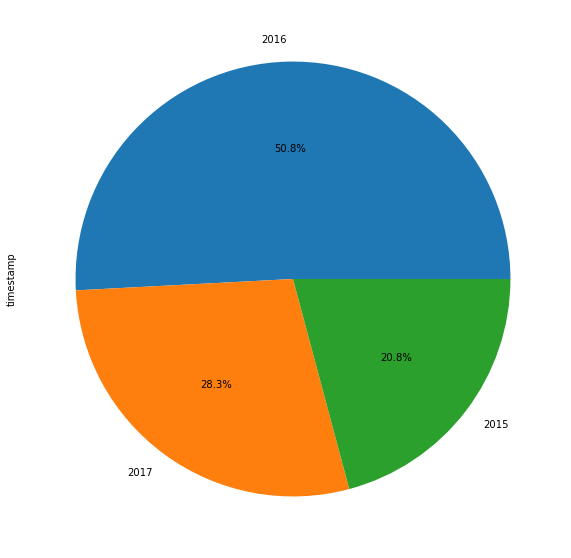

In [110]:
# Plot a visualization of the number of tweets by year
final_df['timestamp'].dt.year.value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(20,10))

#### 2: Are some dog types more pouplar than others?

<AxesSubplot:title={'center':'Dog Tweets Per Year'}, xlabel='Dog Stages', ylabel='Number of Tweets'>

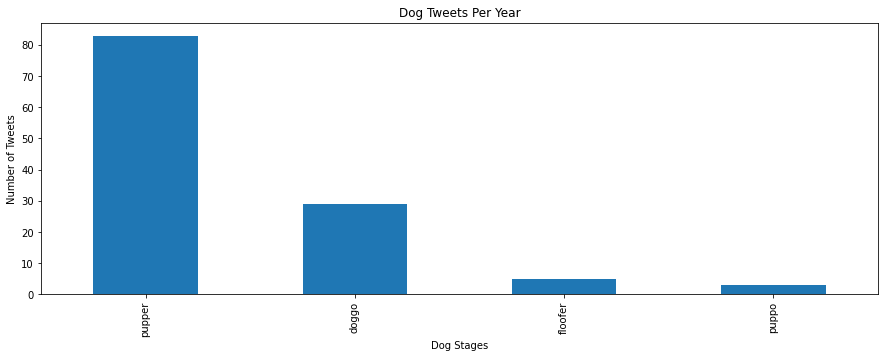

In [111]:
# Plot the dog type distribution in the final_df
final_df['dog_type'].value_counts().plot(kind='bar', figsize=(15,5), title='Dog Tweets Per Year', rot=90, xlabel='Dog Stages', ylabel='Number of Tweets')

#### 3: What are the most common breed of dogs?

In [112]:
# Find the top 50 most common dog breeds
top_20_breeds = final_df['p1'].value_counts().sort_values(ascending=False).head(20)

<AxesSubplot:title={'center':'Top 20 Most Common Dog Breeds'}, xlabel='Dog Breeds', ylabel='Frequency'>

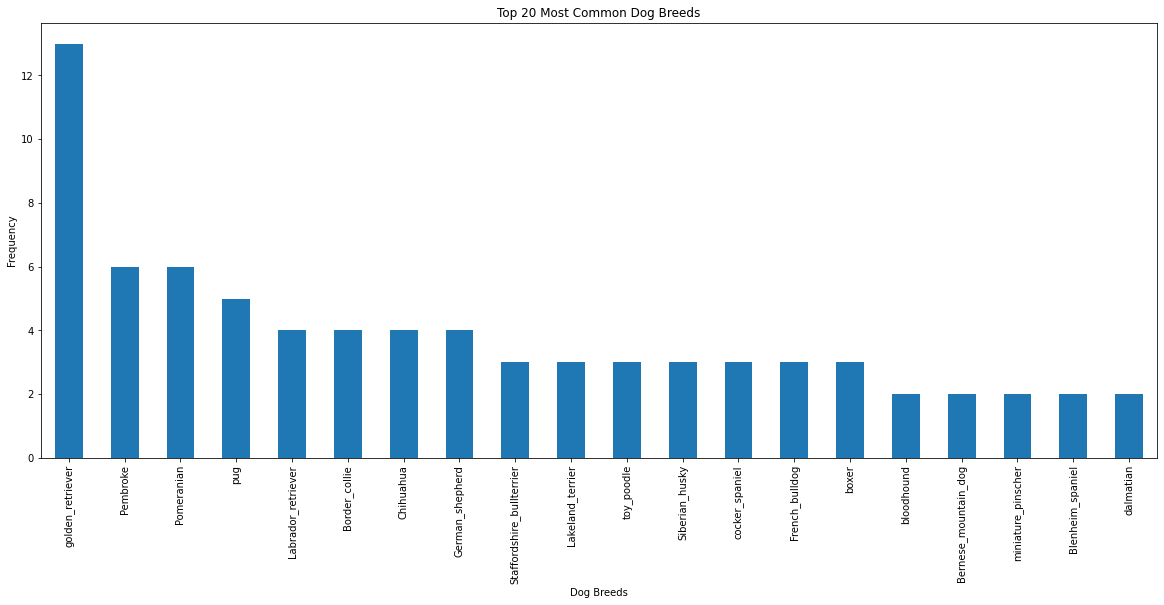

In [113]:
# Plot a bar chart of the top 50 most common dog breeds
top_20_breeds.plot(kind='bar',figsize=(20,8), title='Top 20 Most Common Dog Breeds', xlabel='Dog Breeds', ylabel='Frequency')

#### 4: What breed of dogs had the highest likes and and retweets?

In [128]:
# Breed of dogs with the most tweets
top10_tweets_breeds = final_df.sort_values(['retweet_count', 'favorite_count'], ascending=False)[['favorite_count', 'retweet_count', 'p1']].head(10)

In [115]:
top10_tweets_breeds['total_tweets'] = top10_tweets_breeds['favorite_count'] + top10_tweets_breeds['retweet_count']
top10_tweets_breeds

,favorite_count,retweet_count,p1,total_tweets
20,95450,42228,standard_poodle,137678
49,106827,32883,French_bulldog,139710
56,31800,17209,Pomeranian,49009
4,48410,13076,golden_retriever,61486
15,40325,11878,Great_Pyrenees,52203
12,38074,10706,Staffordshire_bullterrier,48780
0,32467,7711,Pembroke,40178
58,23302,7444,Pembroke,30746
66,24553,7126,Norwegian_elkhound,31679
10,26404,7031,Pomeranian,33435


<AxesSubplot:title={'center':'Top 10 Dogs with the most Tweets'}, xlabel='Dog Breeds', ylabel='Total Tweets'>

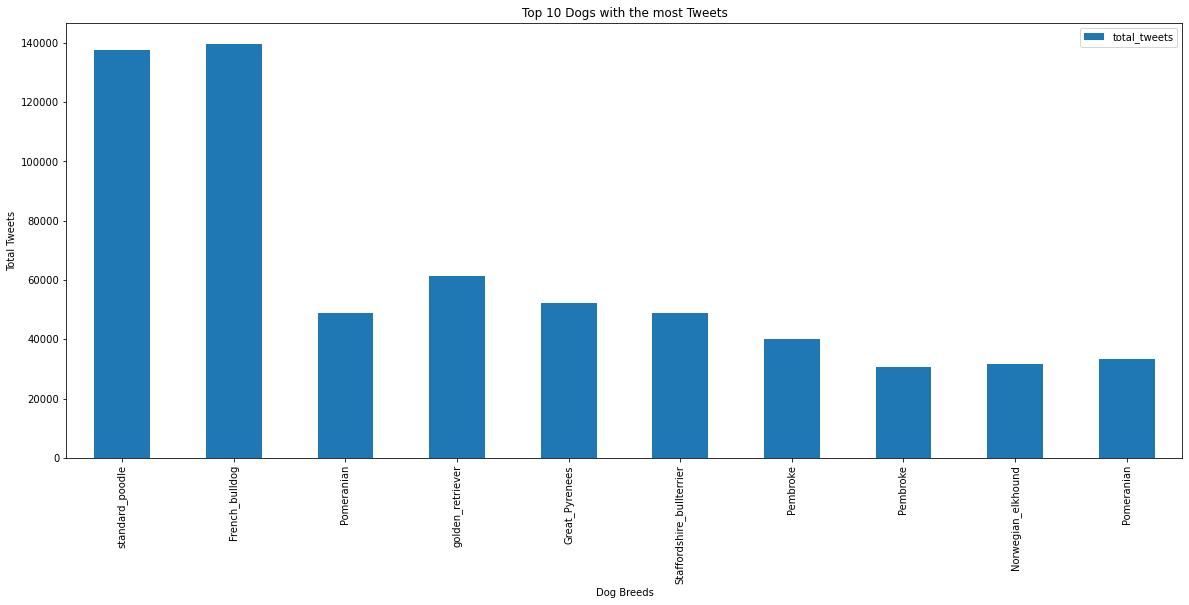

In [116]:

top10_tweets_breeds.plot(kind='bar', x='p1', y='total_tweets', figsize = (20, 8), xlabel='Dog Breeds', ylabel='Total Tweets', title='Top 10 Dogs with the most Tweets')

#### 5: What are the dogs with the highest numerator rating?

In [117]:
# Get the average numerator ratings for each dog breed and get the top 20
breed_ratings = final_df.groupby('p1').mean()['rating_numerator'].sort_values(ascending=False).head(20)

In [118]:
breed_ratings

p1
Bedlington_terrier         14.000000
standard_poodle            14.000000
Irish_setter               14.000000
curly-coated_retriever     13.000000
Dandie_Dinmont             13.000000
borzoi                     13.000000
Pembroke                   12.166667
Old_English_sheepdog       12.000000
Shetland_sheepdog          12.000000
Irish_water_spaniel        12.000000
briard                     12.000000
chow                       12.000000
wire-haired_fox_terrier    12.000000
French_bulldog             12.000000
vizsla                     12.000000
Eskimo_dog                 12.000000
komondor                   12.000000
Cardigan                   12.000000
golden_retriever           11.692308
Pomeranian                 11.666667
Name: rating_numerator, dtype: float64

<AxesSubplot:title={'center':'Top 20 Dogs with the Highest Numerical Ratings'}, xlabel='Dog Breeds', ylabel='Numerical Ratings'>

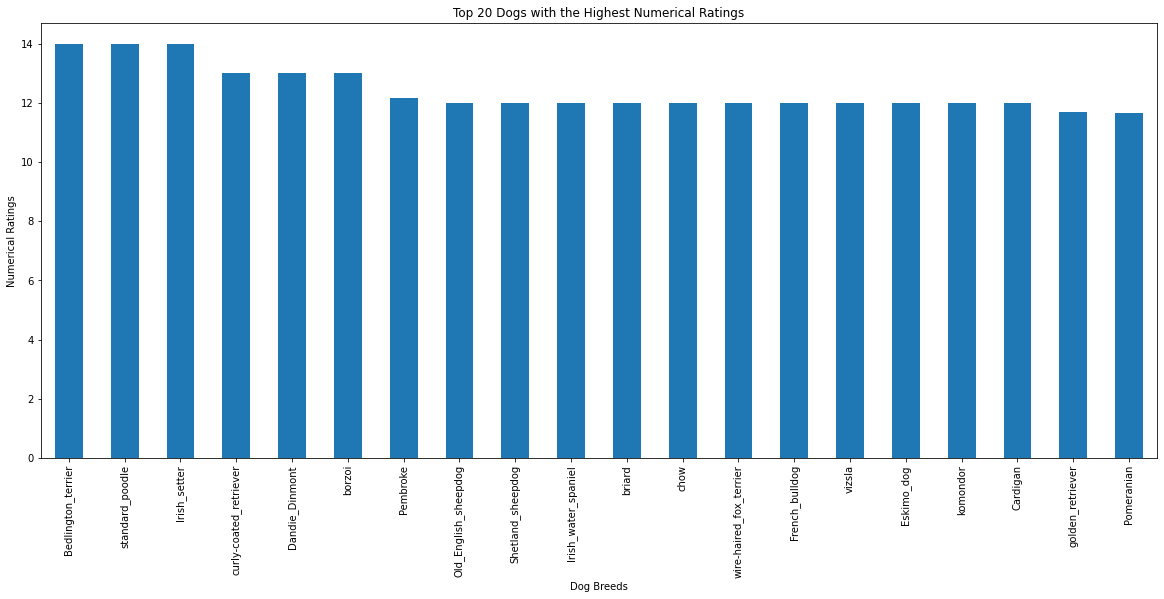

In [119]:
# Plot a bar chart of the top 10 dogs with the most numerical ratings
breed_ratings.plot(kind='bar', x='p1', y='rating_numerator', figsize = (20, 8), xlabel='Dog Breeds', ylabel='Numerical Ratings', title='Top 20 Dogs with the Highest Numerical Ratings')

#### 6: The neural networks had the best performance or confidence on what breed of dogs?

In [120]:
# Check the average confidence level of the dog breeds classified by the model and get the top `20
model_confidence = final_df.groupby('p1').mean()['p1_conf'].sort_values(ascending=False).head(20)

In [121]:
model_confidence

p1
Old_English_sheepdog              0.999715
Bernese_mountain_dog              0.977165
komondor                          0.974781
Samoyed                           0.950053
clumber                           0.946718
German_short-haired_pointer       0.935771
dalmatian                         0.911592
French_bulldog                    0.878647
Labrador_retriever                0.860593
pug                               0.851986
American_Staffordshire_terrier    0.810158
Great_Pyrenees                    0.807354
Pomeranian                        0.794941
papillon                          0.772894
German_shepherd                   0.771459
Shetland_sheepdog                 0.759907
borzoi                            0.742912
whippet                           0.739367
miniature_pinscher                0.736174
curly-coated_retriever            0.733256
Name: p1_conf, dtype: float64

<AxesSubplot:title={'center':'Top 20 Dogs with the Highest Classification Accuracy'}, xlabel='Dog Breeds', ylabel='Confidence Level'>

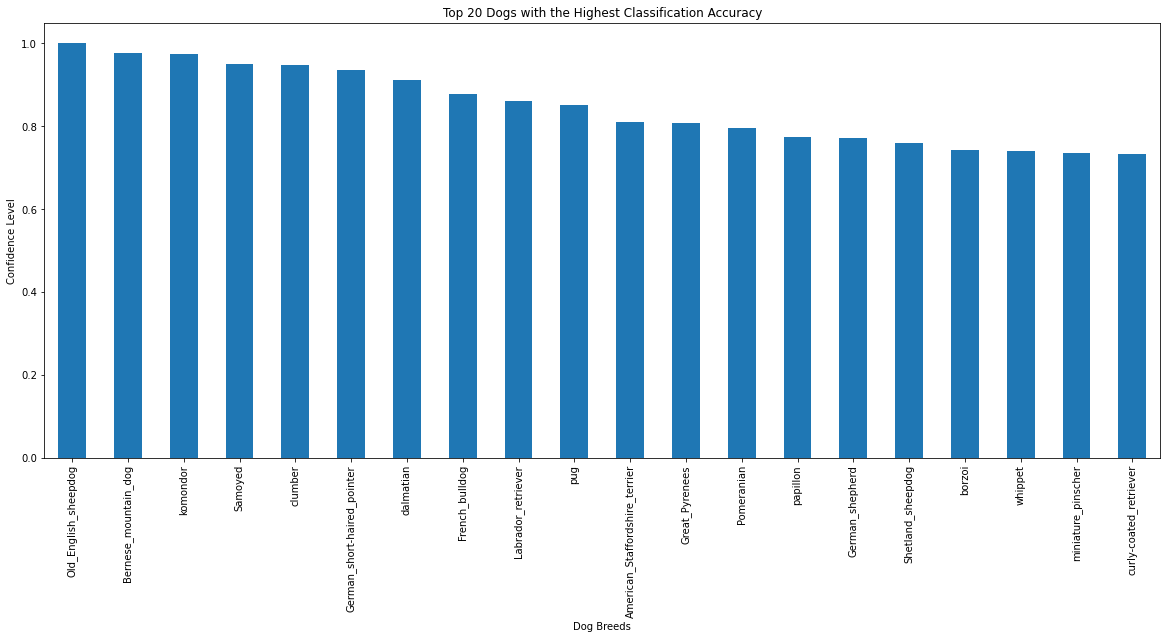

In [122]:
# Plot a bar chart of the top 10 dogs with the highest confidence level
model_confidence.plot(kind='bar', x='p1', y='p1_conf', figsize = (20, 8), xlabel='Dog Breeds', ylabel='Confidence Level', title='Top 20 Dogs with the Highest Classification Accuracy')

#### 7: What is the general correlations between variables?

In [126]:
# Generate a correlation matrix of the variables in the final_df
corr = final_df.corr()
corr

,tweet_id,rating_numerator,rating_denominator,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
tweet_id,1.000000,0.708668,NaN,0.085803,0.080184,-0.053676,0.438309,0.619804
rating_numerator,0.708668,1.000000,NaN,0.041220,0.032937,0.043349,0.452124,0.536060
rating_denominator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
p1_conf,0.085803,0.041220,NaN,1.000000,-0.534703,-0.712839,0.011879,0.052867
p2_conf,0.080184,0.032937,NaN,-0.534703,1.000000,0.418199,0.056576,0.054001
p3_conf,-0.053676,0.043349,NaN,-0.712839,0.418199,1.000000,-0.041398,-0.067722
retweet_count,0.438309,0.452124,NaN,0.011879,0.056576,-0.041398,1.000000,0.946332
favorite_count,0.619804,0.536060,NaN,0.052867,0.054001,-0.067722,0.946332,1.000000


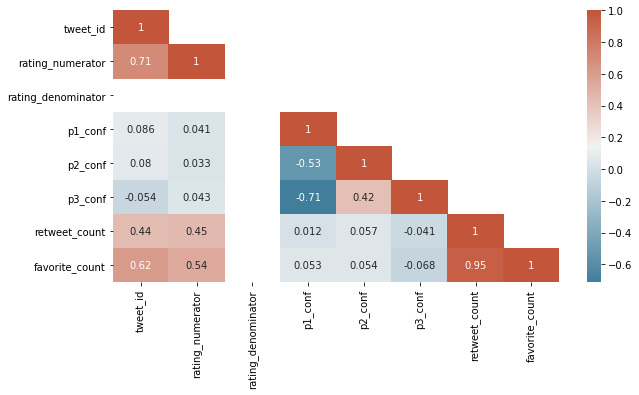

In [127]:
# Correlation between different variables
f, ax = plt.subplots(figsize=(10, 5))
# Create a mask for upper traingle
mask = np.triu(np.ones_like(corr, dtype=bool, ), k=1)
# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Plot the heatmap
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap);

## Insights:
1. From Q1, it shows the WeRateDog twitter page was more active in 2016 with 50.8% of the gathered tweets

2. Among the dog stages, pupper seems to be the most common having 50 more values than the second one of doggo

3. In the Top 20 Most Common Breeds, Golden Retriever was number 1

4. Standard Poodle and French Bulldog seems to be the dogs with the most cumulative tweets

5. Bedlington Terrier, Standard Poodle and Irish Setter were the dogs with the highest average numerator ratings

6. The image classification model had the best accuracies in identifying Old English Sheepdog(99%), Bernese Mountain Dog(98%)
and Komondor (97%)

7. In terms of correlations of the different variables in the final dataframe, the strongest is between retweet count and favorite count( understably so). Similarly, the confidence level of the model in p1_conf and p2_conf was 52% correlated. This shows that the model had great performance even in p2.